# Phishing Email Classification using Random Forest

This notebook uses of a Random Forest classifier as a baseline model for phishing email classification


## Required imports

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

## Dataset
Main dataset preparation flow is carried over here: [data_preparation.ipynb](https://github.com/mikdrob/PhishingEmailMLModel/blob/main/jupiter/notebook/data_preparation.ipynb)

In [99]:
# Load train and test datasets
train_df = pd.read_json('../dataset/input/emails_set_train.jsonl', lines=True)
test_df = pd.read_json('../dataset/input/emails_set_test.jsonl', lines=True)

X_train = train_df['text']
y_train = train_df['is_phishing']
X_test = test_df['text']
y_test = test_df['is_phishing']

## Feature Extraction

Perform feature extraction on the emails using scikit-learn's TfidfTransformer class. The extracted features are then used to train a Random Forest classifier


In [100]:
# Convert email text into TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

Evaluate the performance of the Random Forest classifier on a test set of emails. The evaluation includes calculating the accuracy, precision, recall, and F1 score of the model


In [101]:
# Generate predictions
y_pred_rf = rf.predict(X_test_tfidf)

In [106]:
# Evaluate the performance of the classifier using various metrics
report = classification_report(y_test, y_pred_rf, digits=4)
accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("Random Forest Classification Report:\n", report)
print("Accuracy: {:.5f}".format(accuracy))
print("F1 Score: {:.5f}".format(f1))

Random Forest Classification Report:
               precision    recall  f1-score   support

       False     0.9840    0.9899    0.9870       497
        True     0.9500    0.9223    0.9360       103

    accuracy                         0.9783       600
   macro avg     0.9670    0.9561    0.9615       600
weighted avg     0.9782    0.9783    0.9782       600

Accuracy: 0.97833
F1 Score: 0.93596


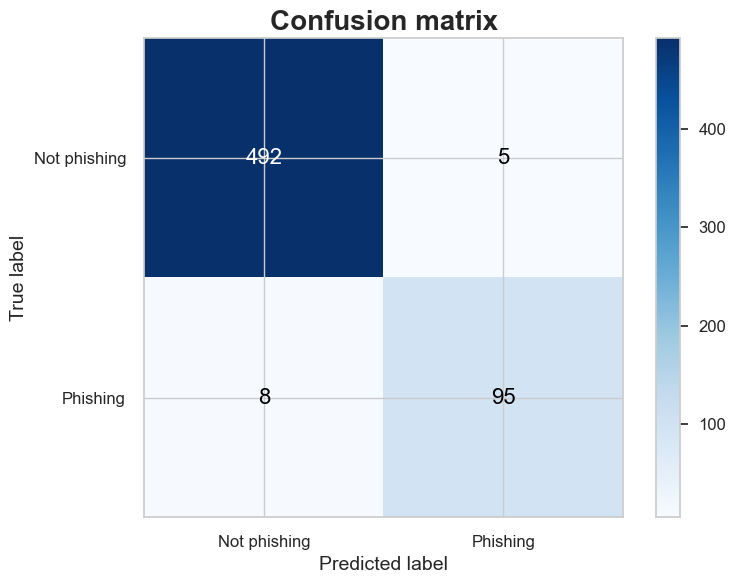

In [103]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Set up plot settings
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Confusion matrix', fontsize=20, fontweight='bold')
ax.set_xlabel('Predicted label', fontsize=14)
ax.set_ylabel('True label', fontsize=14)
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Not phishing', 'Phishing'], fontsize=12)
ax.set_yticklabels(['Not phishing', 'Phishing'], fontsize=12)

# Add text annotations
for i in range(2):
    for j in range(2):
        ax.text(j, i, format(cm[i, j], ',d'), ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black", fontsize=16)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=12)

# Show plot
plt.tight_layout()
plt.show()

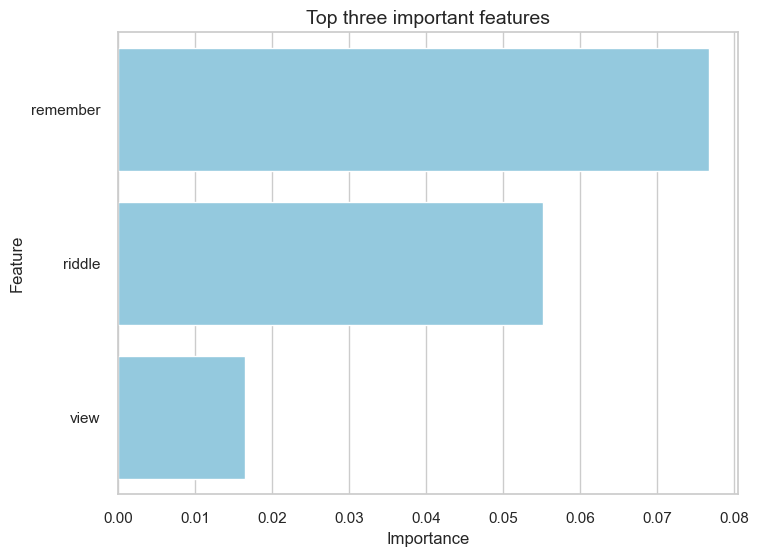

In [104]:
# Plot feature importance
feature_importance = pd.DataFrame(list(zip(list(vectorizer.vocabulary_.keys()), rf.feature_importances_)),
                                  columns=['Feature', 'Importance'])
feature_importance = feature_importance.sort_values(by=['Importance'], ascending=False).head(3)
plt.figure(figsize=(8,6))

sns.barplot(x='Importance', y='Feature', data=feature_importance, color='skyblue')
plt.title('Top three important features', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

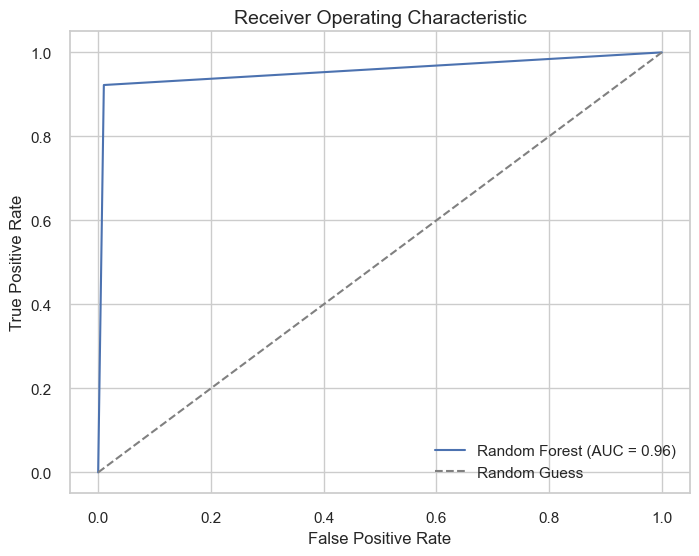

In [105]:
# Compute ROC curve and area under the curve (AUC) for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic', fontsize=14)
plt.legend(loc="lower right")
plt.show()

## Discussion and Conclusion

The Random Forest model achieved an accuracy of 0.97833 and an F1 score of 0.93596. The model performed well in predicting the majority class (False) with a precision of 0.9840, recall of 0.9899, and F1 score of 0.9870. However, the model did not perform as well in predicting the minority class (True) with a precision of 0.9500, recall of 0.9223, and F1 score of 0.9360.